<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_PyTorch/blob/main/PyTorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [1]:
workflow = {1: "data (prepare and load)",
            2: "build model",
            3: "fit model to the data",
            4: "make predictions and evaluate the model",
            5: "save and load model",
            6: "putting it all together"}
workflow

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fit model to the data',
 4: 'make predictions and evaluate the model',
 5: 'save and load model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # All PyTorch building blocks for neural networks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(torch.__version__)

2.3.1+cu121


## 1. Data Preparation

Let's create some dummy data for linear regression model.

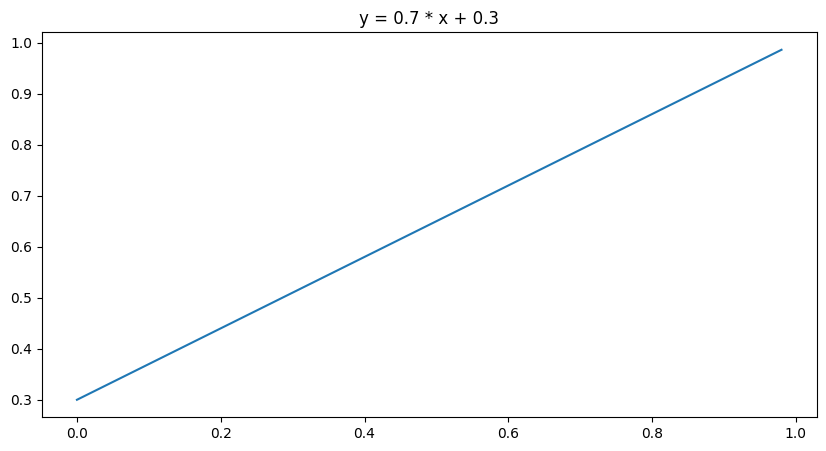

In [ ]:
# Write *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

plt.figure(figsize=(10, 5))
plt.plot(X, y)
plt.title(f"y = {weight} * x + {bias}")
plt.show()

In [ ]:
X[:10], y[:10], X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]),
 torch.Size([50, 1]))

### Splitting data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

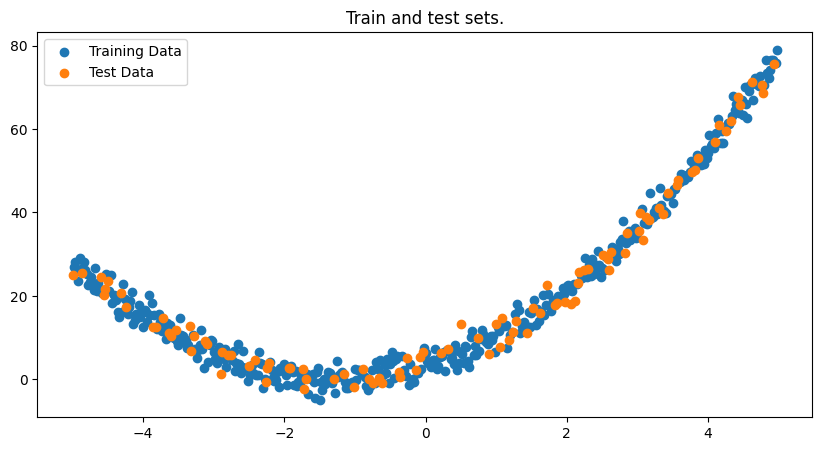

In [24]:
def plot_predictions(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     predictions=None):
  """Visualizes training, test data and predictions if they are available."""
  plt.figure(figsize=(10, 5))
  plt.scatter(X_train, y_train, label="Training Data")
  plt.scatter(X_test, y_test, label="Test Data")

  if predictions is not None:
    plt.title("Train, test sets and predictions")
    plt.scatter(X_test, predictions, label="Test set predictions")
  else:
    plt.title("Train and test sets.")
  plt.legend()
  plt.show()

plot_predictions()

## Building the model

In [ ]:
# Create LinearRegression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float32))

  def forward(self, X) -> torch.Tensor:
    return self.weights * X + self.bias

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

### Checking model internals

In [ ]:
for parameter in model_0.parameters():
  print(parameter.item())

1.5409960746765137
-0.293428897857666


In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

### Making predictions using `torch.inference_mode()`

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[ 0.3538],
        [-0.0777],
        [ 0.0456],
        [ 0.8777],
        [ 0.1072],
        [-0.1701],
        [ 1.0010],
        [ 0.2305],
        [ 0.7853],
        [ 0.1997]])

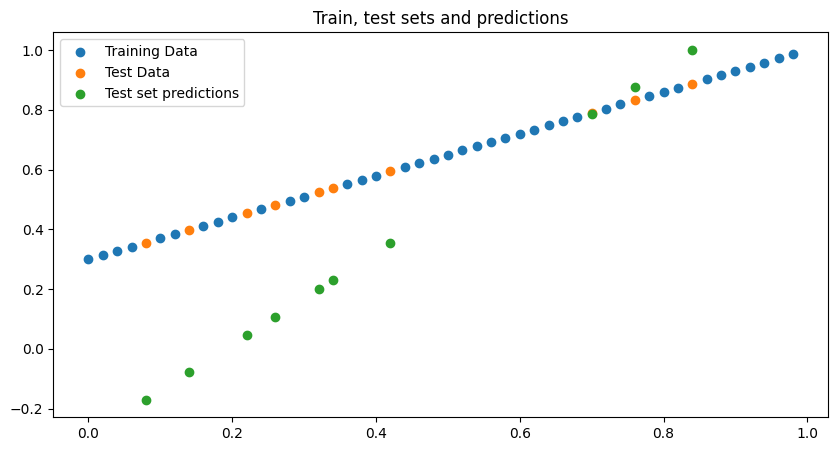

In [ ]:
plot_predictions(predictions=y_pred)

## Train model

In [ ]:
# Specify optimizer and loss function
optimizer = torch.optim.SGD(model_0.parameters())
loss_fn = nn.MSELoss()

### Building training loop

In [ ]:
epochs = 500

torch.manual_seed(0)

for epoch in range(epochs):

  # Set the model to the training mode
  model_0.train()

  for index, train_instance in enumerate(X_train):
    test_instance = y_train[index]

    # Zero gradients for every training instance
    optimizer.zero_grad()

    # Make preds
    y_pred = model_0(train_instance)

    # Compute loss and its gradients
    loss = loss_fn(y_pred, test_instance)
    loss.backward()

    # Adjust weights
    optimizer.step()

  # Set the model to the inference mode
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(y_test, test_pred)

  if epoch % 50 == 0:
    print(f"Epoch {epoch}, Test Loss: {test_loss}")

list(model_0.parameters())

Epoch 0, Test Loss: 0.10204152017831802
Epoch 50, Test Loss: 0.039070259779691696
Epoch 100, Test Loss: 0.022758495062589645
Epoch 150, Test Loss: 0.013290938921272755
Epoch 200, Test Loss: 0.007762046996504068
Epoch 250, Test Loss: 0.004533120431005955
Epoch 300, Test Loss: 0.002647391753271222
Epoch 350, Test Loss: 0.0015461044386029243
Epoch 400, Test Loss: 0.0009029450593516231
Epoch 450, Test Loss: 0.0005273331771604717


[Parameter containing:
 tensor([0.7610], requires_grad=True),
 Parameter containing:
 tensor([0.2667], requires_grad=True)]

In [ ]:
weight, bias

(0.7, 0.3)

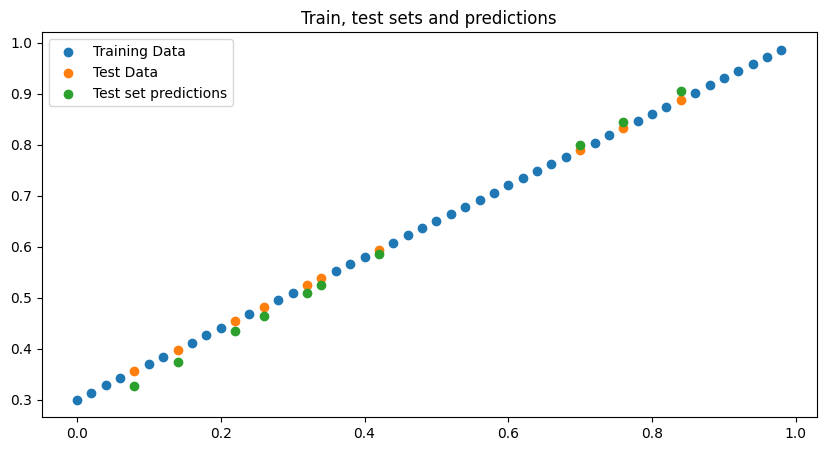

In [ ]:
with torch.inference_mode():
  y_pred_model_0 = model_0(X_test)
plot_predictions(predictions=y_pred_model_0)

## Saving and loading the model

In [ ]:
torch.save(model_0.state_dict(), "model_0.h5")

In [ ]:
model_0 = LinearRegressionModel()
model_0.load_state_dict(torch.load("model_0.h5"))
list(model_0.parameters())

[Parameter containing:
 tensor([0.7610], requires_grad=True),
 Parameter containing:
 tensor([0.2667], requires_grad=True)]

# Putting it all together

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.3.1+cu121


In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device we are going to use: {device}")

Device we are going to use: cpu


## 6.1 Data

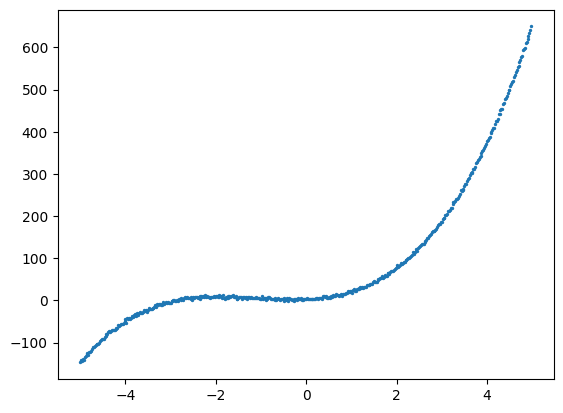

In [55]:
start = -5
end = 5
step = 0.02

X = torch.arange(start, end, step=step).unsqueeze(dim=1)
noise = torch.randn(X.size())
y = 3 * X * X * X + 10 * X * X + 5 * X + 3.2 + noise * 2

plt.scatter(X.numpy(), y.numpy(), s=2)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6.2 Model

In [58]:
from torch import nn

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(data=torch.randn(3))
    self.bias = nn.Parameter(data=torch.randn(1))

  def forward(self, x):
    return x*x*x*self.weights[0] + x*x*self.weights[1] + x*self.weights[2] + self.bias

model = Model()
list(model.parameters())

[Parameter containing:
 tensor([ 0.9180,  1.0032, -0.3237], requires_grad=True),
 Parameter containing:
 tensor([0.3019], requires_grad=True)]

## 6.3 Training

In [59]:
optimizer = torch.optim.SGD(model.parameters())
loss_fn = torch.nn.L1Loss()

epochs = 200

for epoch in range(epochs):

  for i in range(len(X_train)):

    model.train()
    train_x_instance = X_train[i]
    train_y_instance = y_train[i]

    optimizer.zero_grad()
    outputs = model(train_x_instance)
    loss = loss_fn(outputs, train_y_instance)
    loss.backward()
    optimizer.step()

  if epoch % 40 == 0:
    model.eval()
    with torch.inference_mode():
      y_pred = model(X_test)
      loss = loss_fn(y_pred, y_test)
    print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 0, Loss: 44.654396057128906
Epoch: 40, Loss: 3.547435998916626
Epoch: 80, Loss: 3.285876512527466
Epoch: 120, Loss: 3.3642947673797607
Epoch: 160, Loss: 2.9852163791656494


In [64]:
list(model.parameters())

[Parameter containing:
 tensor([3.1168, 9.9917, 5.1415], requires_grad=True),
 Parameter containing:
 tensor([3.1219], requires_grad=True)]

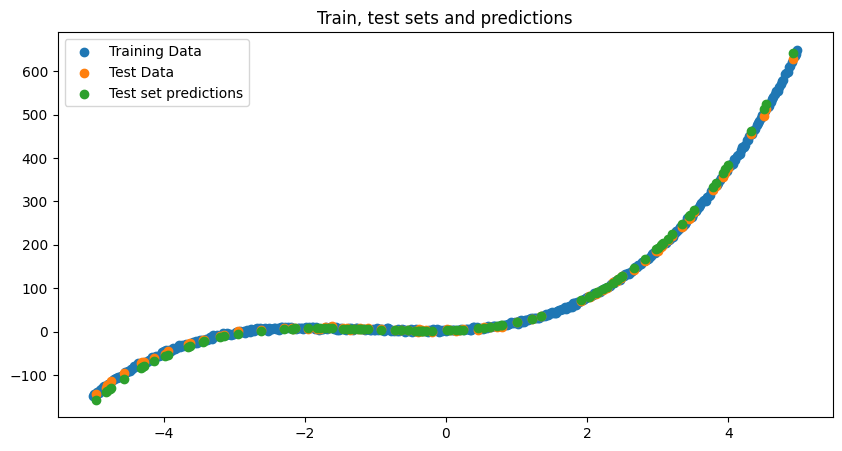

In [69]:
with torch.inference_mode():
  preds = model(X_test)
plot_predictions(X_train, y_train, X_test, y_test, predictions=preds)

In [71]:
torch.save(model.state_dict(), "nice_model.h5")

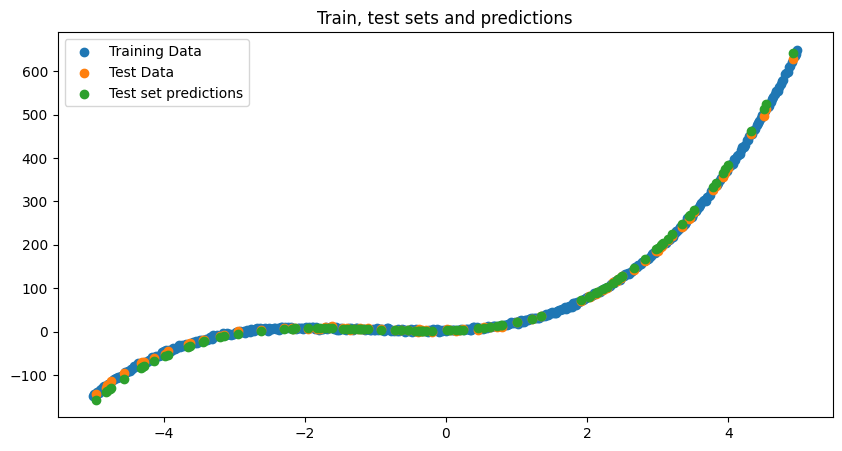

In [73]:
loaded_model = Model()
loaded_model.load_state_dict(torch.load("nice_model.h5"))

with torch.inference_mode():
  preds = loaded_model(X_test)
plot_predictions(X_train, y_train, X_test, y_test, predictions=preds)